# 🧠 LSTM(Long Short-Term Memory) 완전 정리

LSTM은 **장기 의존성(long-term dependency)** 을 학습하도록 설계된 순환 신경망(RNN) 구조입니다.  
기본 RNN이 겪는 **기울기 소실/폭주** 문제를 **게이트(gate)** 와 **셀 상태(cell state)** 로 완화해,  
오래전 정보까지 비교적 안정적으로 기억·활용할 수 있습니다.

---

## 1) LSTM이 필요한 이유

| 문제 | 기본 RNN의 한계 | LSTM의 아이디어 |
|---|---|---|
| 긴 문맥 기억 | 시간 길어질수록 기울기 소실 → 먼 과거 반영 어려움 | **셀 상태 \(c_t\)** 를 “고속도로”처럼 유지하여 장기 정보 전달 |
| 선택적 기억/망각 | 모든 정보가 동일 가중 | **게이트**(망각/입력/출력)로 정보를 선택적으로 보관·삭제·노출 |

---


## 3) 텐서 모양(Shapes) — PyTorch 기준

| 이름 | 모양 | 설명 |
|---|---|---|
| 입력 `x` | `(B, T, F)` | 배치 B, 시퀀스 길이 T, 피처 수 F |
| 출력 `out` | `(B, T, H)` | 각 시점의 은닉 표현 |
| 마지막 은닉 `h_n` | `(L·D, B, H)` | 레이어 수 L, 방향 수 D(단방향=1, 양방향=2) |
| 마지막 셀 `c_n` | `(L·D, B, H)` | 마지막 시점의 셀 상태 |

> **Many-to-One**(예: 다음 1스텝 예측/문장 분류): `h_n[-1]` 또는 `out[:, -1, :]`를 주로 사용합니다.

---

## 4) PyTorch `nn.LSTM` 주요 매개변수

| 파라미터 | 의미 | 메모/선택 가이드 |
|---|---|---|
| `input_size` | 한 시점 피처 수(F) | 단변량=1, 다변량=피처 개수 |
| `hidden_size` | 은닉 차원(H) | 32/64/128부터 시도 |
| `num_layers` | LSTM 층 수 | 1–2 권장(깊어질수록 과적합/학습난이도↑) |
| `bias` | 편향 사용 | 기본 True |
| `batch_first` | 입력/출력 첫 차원을 배치로 | **True 권장** (모양 `(B,T,F)`) |
| `dropout` | 층 사이 드롭아웃 | **층≥2일 때만 동작** (0.1–0.3) |
| `bidirectional` | 양방향 여부 | 시퀀스 라벨링에 유리, 원스텝 예측은 이득 제한적 |

---

## 5) 하이퍼파라미터 선택 팁

- **윈도우 길이(T)**: 데이터 주기/패턴 고려하여 30/60/120 등 2–3값 비교  
- **hidden_size(H)**: 32→64→128 순으로 늘리며 성능·과적합 균형 탐색  
- **층 수(L)**: 1→2만 시험(2층 시 `dropout` 0.1–0.3)  
- **정규화**: 과적합 시 dropout↑, weight decay(1e-4~5e-4), early stopping  
- **학습 안정화**: `clip_grad_norm_`(예: 1.0), 러닝레이트 1e-3 근처부터

---


## 6) RNN vs LSTM vs GRU — 언제 무엇을?

| 모델 | 장점 | 단점 | 추천 상황 |
|---|---|---|---|
| **RNN(기본형)** | 구조 단순, 빠름 | 장기 의존성 취약 | 짧은 패턴, 가벼운 베이스라인 |
| **LSTM** | 장기 문맥 보존 우수 | 파라미터/연산 많음 | 긴 문맥, 불안정한 RNN 대체 |
| **GRU** | LSTM보다 가벼움 | 케이스에 따라 LSTM보다 약간 낮을 수 | 리소스 한정, 빠른 실험 |

---

## 7) 자주 하는 실수 & 해결

| 실수 | 증상 | 해결 |
|---|---|---|
| 입력 모양 오류 | 차원 mismatch 에러 | `(B,T,F)`, `batch_first=True` 확인 |
| 데이터 누수 | Val 성능 비정상적으로 좋음 | 스케일러는 **Train으로만** `fit` |
| 과적합 | Train↓ Val↑ | dropout↑, H/L↓, 조기종료, 피처 정제 |
| 학습 불안정 | 손실 발산 | gradient clipping, LR↓, 표준화 필수 |
| 잘못된 평균 | MSE 계산 왜곡 | 배치평균×배치크기 누적 → 전체샘플로 나누기 |

---

device: cpu
[01] train_mse=0.780632 | val_mse=0.451303
[02] train_mse=0.247025 | val_mse=0.055255
[03] train_mse=0.032428 | val_mse=0.023937
[04] train_mse=0.020607 | val_mse=0.018036
[05] train_mse=0.018474 | val_mse=0.016490
[06] train_mse=0.017398 | val_mse=0.015987
[07] train_mse=0.016805 | val_mse=0.016989
[08] train_mse=0.016911 | val_mse=0.016666
[09] train_mse=0.016753 | val_mse=0.015511
[10] train_mse=0.016058 | val_mse=0.015032
[11] train_mse=0.015727 | val_mse=0.015503
[12] train_mse=0.016064 | val_mse=0.014799
[13] train_mse=0.015632 | val_mse=0.015586
[14] train_mse=0.015641 | val_mse=0.014680
[15] train_mse=0.014993 | val_mse=0.014455


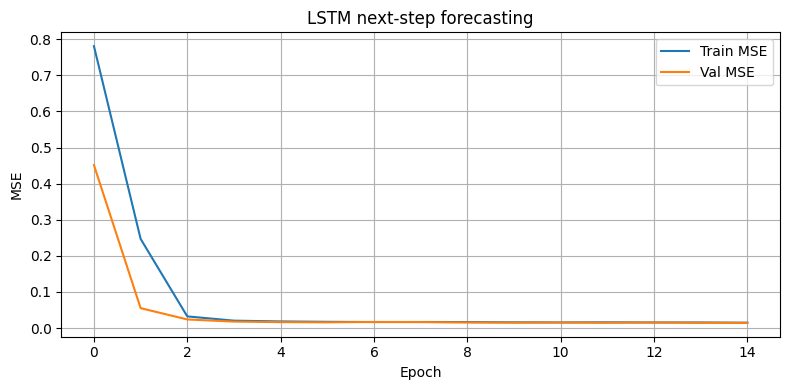

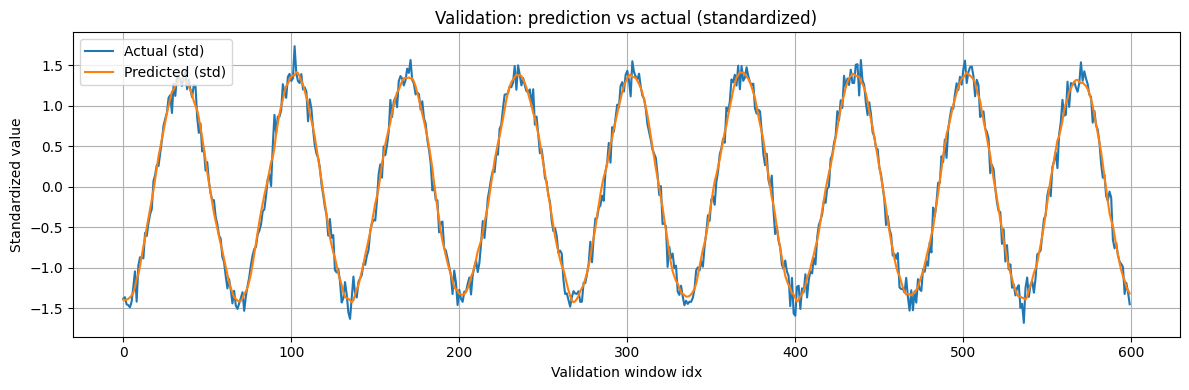

One example (orig scale) | true=-0.9831 pred=-0.9894


In [2]:
# ===============================================
# LSTM으로 단변량 시계열 "다음 1스텝" 예측 (PyTorch)
# ===============================================

import math, random
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

# ----- 재현성 -----
def set_seed(seed=42):
    random.seed(seed); np.random.seed(seed)
    torch.manual_seed(seed); torch.cuda.manual_seed_all(seed)
set_seed(42)

device = "cuda" if torch.cuda.is_available() else "cpu"
print("device:", device)

# ----- 1) 데이터: 사인파 + 노이즈 -----
def make_sine(n=3000, freq=0.02, noise=0.05):
    xs = torch.arange(n).float()
    ys = torch.sin(2 * math.pi * freq * xs) + noise * torch.randn(n)
    return ys  # shape: (n,)

series = make_sine(n=4000, freq=0.015, noise=0.08)  # (4000,)

# ----- 2) 학습/검증 분할 + 표준화(Train 통계만) -----
split = int(len(series) * 0.8)
train_series = series[:split]
val_series   = series[split:]

mean = train_series.mean()
std  = train_series.std()
train_std = (train_series - mean) / (std + 1e-8)
val_std   = (val_series   - mean) / (std + 1e-8)

# ----- 3) 윈도우 Dataset (X: (T,1), y: (1,)) -----
class WindowDS(Dataset):
    def __init__(self, series_1d: torch.Tensor, window: int):
        self.s = series_1d
        self.window = window
        self.n = len(self.s) - window

    def __len__(self):
        return max(self.n, 0)

    def __getitem__(self, i):
        x = self.s[i:i+self.window].unsqueeze(-1)  # (T,) -> (T,1)  input_size=1
        y = self.s[i+self.window].unsqueeze(-1)    # (1,)
        return x, y

WINDOW = 48
train_ds = WindowDS(train_std, WINDOW)
val_ds   = WindowDS(val_std,   WINDOW)

train_dl = DataLoader(train_ds, batch_size=128, shuffle=True,  drop_last=True)
val_dl   = DataLoader(val_ds,   batch_size=256, shuffle=False, drop_last=False)

# ----- 4) 모델 정의: LSTM + Linear(1) -----
class LSTMRegressor(nn.Module):
    """
    입력 x: (B, T, F=1)
    LSTM out: (B, T, H), (h_n, c_n) with shapes (L*D,B,H)
    보통 마지막 레이어 은닉 h_n[-1]을 꺼내 Linear로 회귀.
    """
    def __init__(self, input_size=1, hidden_size=64, num_layers=1,
                 dropout=0.0, bidirectional=False, batch_first=True):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=batch_first,
            dropout=dropout,            # 층≥2일 때만 적용
            bidirectional=bidirectional
        )
        out_dim = hidden_size * (2 if bidirectional else 1)
        self.head = nn.Linear(out_dim, 1)

    def forward(self, x):
        out, (h_n, c_n) = self.lstm(x)  # out:(B,T,H), h_n:(L*D,B,H)
        last = h_n[-1]                  # (B,H) 또는 (B,2H)
        yhat = self.head(last)          # (B,1)
        return yhat

model = LSTMRegressor(input_size=1, hidden_size=64, num_layers=1).to(device)

# ----- 5) 학습 준비 -----
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
MAX_NORM = 1.0  # gradient clipping

@torch.no_grad()
def evaluate_mse(dl):
    model.eval()
    tot, n = 0.0, 0
    for X, y in dl:
        X = X.to(device).float()
        y = y.to(device).float()
        yhat = model(X)
        loss = criterion(yhat, y)
        tot += loss.item() * y.size(0)
        n   += y.size(0)
    return tot / max(n, 1)

# ----- 6) 학습 루프 -----
EPOCHS = 15
tr_hist, va_hist = [], []
for ep in range(1, EPOCHS+1):
    model.train()
    run, n = 0.0, 0
    for X, y in train_dl:
        X = X.to(device).float()
        y = y.to(device).float()

        optimizer.zero_grad()
        yhat = model(X)
        loss = criterion(yhat, y)
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), MAX_NORM)
        optimizer.step()

        run += loss.item() * y.size(0)
        n   += y.size(0)
    tr = run / max(n, 1)
    va = evaluate_mse(val_dl)
    tr_hist.append(tr); va_hist.append(va)
    print(f"[{ep:02d}] train_mse={tr:.6f} | val_mse={va:.6f}")

# ----- 7) 학습 곡선 -----
plt.figure(figsize=(8,4))
plt.plot(tr_hist, label="Train MSE")
plt.plot(va_hist, label="Val MSE")
plt.title("LSTM next-step forecasting")
plt.xlabel("Epoch"); plt.ylabel("MSE")
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()

# ----- 8) 검증 구간 예측 vs 실제(표준화 스케일) -----
model.eval()
preds, trues = [], []
with torch.no_grad():
    for X, y in val_dl:
        yhat = model(X.to(device).float()).cpu()
        preds.append(yhat)
        trues.append(y)

preds = torch.cat(preds).squeeze(-1).numpy()
trues = torch.cat(trues).squeeze(-1).numpy()

plt.figure(figsize=(12,4))
plt.plot(trues[:600], label="Actual (std)")
plt.plot(preds[:600], label="Predicted (std)")
plt.title("Validation: prediction vs actual (standardized)")
plt.xlabel("Validation window idx"); plt.ylabel("Standardized value")
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()

# ----- 9) 원 스케일로 보기 (단일 예시) -----
X0, y0 = next(iter(val_dl))
with torch.no_grad():
    y0_hat = model(X0.to(device).float()).cpu()
true_value = y0[0].item() * float(std) + float(mean)
pred_value = y0_hat[0].item() * float(std) + float(mean)
print(f"One example (orig scale) | true={true_value:.4f} pred={pred_value:.4f}")


[Epoch 01] train_mse=0.195504 | val_mse=57.695603
[Epoch 02] train_mse=0.002873 | val_mse=55.101287
[Epoch 03] train_mse=0.002332 | val_mse=54.347262
[Epoch 04] train_mse=0.001787 | val_mse=52.218091
[Epoch 05] train_mse=0.001681 | val_mse=50.763584
[Epoch 06] train_mse=0.001596 | val_mse=49.642516
[Epoch 07] train_mse=0.001608 | val_mse=48.637998
[Epoch 08] train_mse=0.001574 | val_mse=47.647718
[Epoch 09] train_mse=0.001460 | val_mse=46.747333
[Epoch 10] train_mse=0.001627 | val_mse=45.670750
[Epoch 11] train_mse=0.001779 | val_mse=45.124325
[Epoch 12] train_mse=0.001555 | val_mse=44.450103
[Epoch 13] train_mse=0.001337 | val_mse=43.363461
[Epoch 14] train_mse=0.001416 | val_mse=42.680901
[Epoch 15] train_mse=0.001311 | val_mse=41.643294
[Epoch 16] train_mse=0.001439 | val_mse=41.101539
[Epoch 17] train_mse=0.001286 | val_mse=40.298556
[Epoch 18] train_mse=0.001338 | val_mse=39.551604
[Epoch 19] train_mse=0.001788 | val_mse=38.788788
[Epoch 20] train_mse=0.001350 | val_mse=37.899711


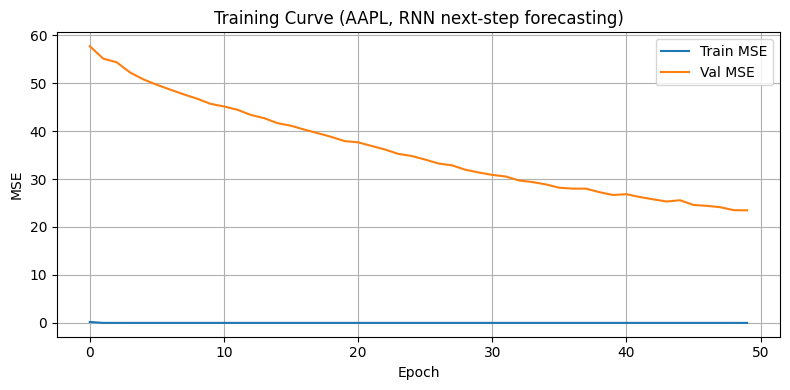

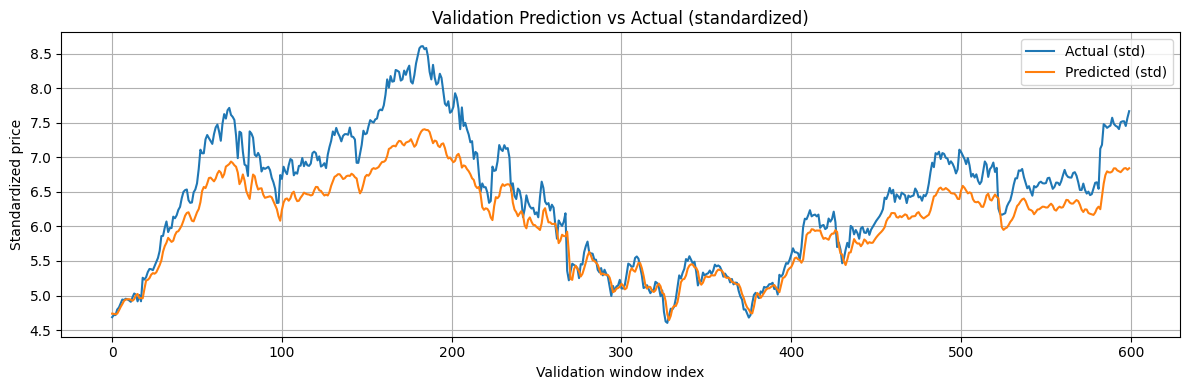

In [3]:
"""
RNN + sklearn StandardScaler로 AAPL 주가 '다음 1일' 예측 (PyTorch)
- 데이터: CSV (일반적으로 Yahoo Finance 형식: Date, Open, High, Low, Close, Adj Close, Volume)
- 입력: 과거 WINDOW일의 종가(또는 조정종가) → (window, 1)
- 출력: 다음 1일 종가 (회귀)
- 포인트:
  * 표준화는 반드시 Train으로만 fit, 그 스케일러로 Train/Val transform (데이터 누수 방지)
  * (batch, seq_len, input_size) = (B, WINDOW, 1)
  * nn.RNN(기본형) + 마지막 은닉 h_n[-1] → Linear(1)
  * gradient clipping으로 RNN 안정화
"""

import pandas as pd
import matplotlib.pyplot as plt
from typing import Optional

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler

# ---------------------------
# 설정값
# ---------------------------
WINDOW   = 60                # 과거 60일을 보고
EPOCHS   = 50                # 10~30 선에서 시도
BATCH_T  = 128               # 배치 크기
LR       = 1e-3              # 학습률
HIDDEN   = 128                # 은닉 크기(32/64/128)


# ---------------------------
# 1) CSV 로드 & 컬럼 선택 & 정렬
# ---------------------------
df = pd.read_csv("data/AAPL.csv")


use_df = df[['Date', 'Adj Close']].copy()
use_df = use_df.dropna().reset_index(drop=True)

# ---------------------------
# 2) torch 텐서화 전: sklearn 표준화 (Train으로만 fit)
# ---------------------------
values = use_df['Adj Close'].astype(float).values.reshape(-1, 1)  # (N,1)

split_idx = int(len(values) * 0.8)           # 시간 순서 유지 분할
train_np  = values[:split_idx]               # (N_train, 1)
val_np    = values[split_idx:]               # (N_val, 1)

scaler = StandardScaler()
scaler.fit(train_np)                         # ✅ Train으로만 학습

train_std_np = scaler.transform(train_np)    # (N_train, 1)
val_std_np   = scaler.transform(val_np)      # (N_val, 1)

# torch 텐서로 변환 (RNN 준비)
train_std = torch.tensor(train_std_np.squeeze(-1), dtype=torch.float32)  # (N_train,)
val_std   = torch.tensor(val_std_np.squeeze(-1),   dtype=torch.float32)  # (N_val,)

# ---------------------------
# 3) 슬라이딩 윈도우 Dataset
# ---------------------------
class WindowDS(Dataset):
    """
    단변량 시계열(표준화된 1D 텐서)을 윈도우로 자르는 Dataset
    X: (window, 1), y: (1,)
    """
    def __init__(self, series_1d: torch.Tensor, window: int):
        self.series = series_1d
        self.window = window
        self.n = len(series_1d) - window

    def __len__(self):
        return max(self.n, 0)

    def __getitem__(self, idx):
        x = self.series[idx: idx + self.window].unsqueeze(-1)  # (window, 1)
        y = self.series[idx + self.window].unsqueeze(-1)       # (1,)
        return x, y

train_ds = WindowDS(train_std, WINDOW)
val_ds   = WindowDS(val_std,   WINDOW)

train_dl = DataLoader(train_ds, batch_size=BATCH_T, shuffle=True,  drop_last=True)
val_dl   = DataLoader(val_ds,   batch_size=256,    shuffle=False, drop_last=False)

# =========================
# 4) LSTM 모델
# =========================
class LSTMRegressor(nn.Module):
    """
    입력 x: (B, T, F=1), batch_first=True
    LSTM 반환: out:(B,T,H), (h_n,c_n) with (L*D,B,H)
    마지막 레이어의 h_n[-1]만 사용해 스칼라 회귀.
    """
    def __init__(self, hidden_size=64, num_layers=1, dropout=0.0, bidirectional=False):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=1,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout,             # 층≥2일 때만 동작
            bidirectional=bidirectional
        )
        out_dim = hidden_size * (2 if bidirectional else 1)
        self.head = nn.Linear(out_dim, 1)

    def forward(self, x):           # x:(B,T,1)
        out, (h_n, c_n) = self.lstm(x)
        last = h_n[-1]              # (B,H) or (B,2H)
        yhat = self.head(last)      # (B,1)
        return yhat

model = LSTMRegressor(hidden_size=HIDDEN, num_layers=1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# ---------------------------
# 5) 평가 함수
# ---------------------------
@torch.no_grad()
def evaluate_mse(dataloader):
    model.eval()
    total_loss, total_n = 0.0, 0
    for X, y in dataloader:
        X = X.float()
        y = y.float()
        yhat = model(X)
        loss = criterion(yhat, y)
        total_loss += loss.item() * y.size(0)
        total_n += y.size(0)
    return total_loss / max(total_n, 1)

# ---------------------------
# 6) 학습 루프
# ---------------------------
train_hist, val_hist = [], []
for epoch in range(1, EPOCHS + 1):
    model.train()
    run_loss, n_seen = 0.0, 0
    for X, y in train_dl:
        X = X.float()
        y = y.float()

        optimizer.zero_grad()
        yhat = model(X)         # (B,1)
        loss = criterion(yhat, y)
        loss.backward()
        optimizer.step()

        run_loss += loss.item() * y.size(0)
        n_seen   += y.size(0)

    train_mse = run_loss / max(n_seen, 1)
    val_mse   = evaluate_mse(val_dl)
    train_hist.append(train_mse)
    val_hist.append(val_mse)
    print(f"[Epoch {epoch:02d}] train_mse={train_mse:.6f} | val_mse={val_mse:.6f}")

# ---------------------------
# 7) 학습 곡선 시각화
# ---------------------------
plt.figure(figsize=(8,4))
plt.plot(train_hist, label="Train MSE")
plt.plot(val_hist,   label="Val MSE")
plt.title("Training Curve (AAPL, RNN next-step forecasting)")
plt.xlabel("Epoch"); plt.ylabel("MSE")
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()

# ---------------------------
# 8) 검증셋 예측 vs 실제 (표준화 스케일)
# ---------------------------
model.eval()
preds_std, trues_std = [], []
with torch.no_grad():
    for X, y in val_dl:
        X = X.float()
        y = y.float()
        yhat = model(X)
        preds_std.append(yhat.cpu())
        trues_std.append(y.cpu())

preds_std = torch.cat(preds_std, dim=0).squeeze(-1).numpy()  # (N_val - WINDOW,)
trues_std = torch.cat(trues_std, dim=0).squeeze(-1).numpy()

plt.figure(figsize=(12,4))
plt.plot(trues_std[:600], label="Actual (std)")
plt.plot(preds_std[:600], label="Predicted (std)")
plt.title("Validation Prediction vs Actual (standardized)")
plt.xlabel("Validation window index"); plt.ylabel("Standardized price")
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()



[01] train_mse=0.005387 | val_mse=0.079320
[02] train_mse=0.000042 | val_mse=0.056455
[03] train_mse=0.000039 | val_mse=0.059320
[04] train_mse=0.000033 | val_mse=0.062449
[05] train_mse=0.000037 | val_mse=0.052107
[06] train_mse=0.000040 | val_mse=0.063812
[07] train_mse=0.000035 | val_mse=0.051094
[08] train_mse=0.000034 | val_mse=0.047507
[09] train_mse=0.000034 | val_mse=0.055610
[10] train_mse=0.000032 | val_mse=0.059287
[11] train_mse=0.000038 | val_mse=0.056344
[12] train_mse=0.000038 | val_mse=0.063095
[13] train_mse=0.000037 | val_mse=0.057088
[14] train_mse=0.000039 | val_mse=0.048207
[15] train_mse=0.000041 | val_mse=0.069539
[16] train_mse=0.000033 | val_mse=0.056294
[17] train_mse=0.000048 | val_mse=0.068702
[18] train_mse=0.000046 | val_mse=0.076086
[19] train_mse=0.000039 | val_mse=0.061652
[20] train_mse=0.000034 | val_mse=0.047457
[21] train_mse=0.000036 | val_mse=0.058529
[22] train_mse=0.000032 | val_mse=0.048005
[23] train_mse=0.000035 | val_mse=0.050587
[24] train_

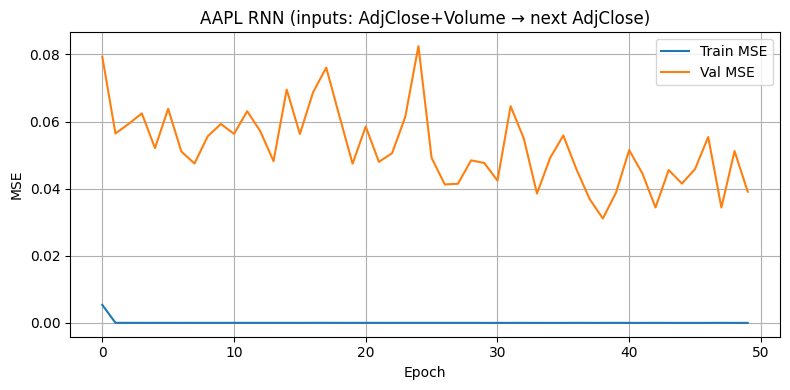

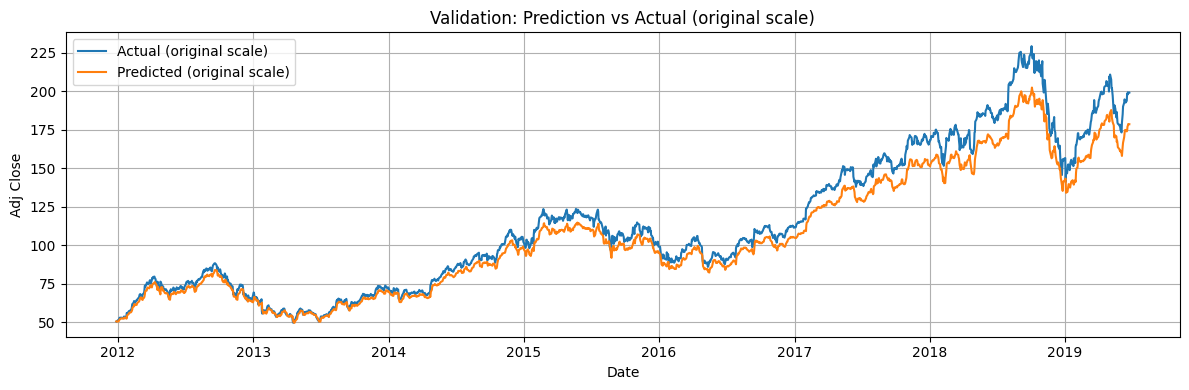

In [10]:
"""
RNN + sklearn StandardScaler로 AAPL 주가 '다음 1일' 예측 (PyTorch)
- 데이터: CSV (일반적으로 Yahoo Finance 형식: Date, Open, High, Low, Close, Adj Close, Volume)
- 입력: 과거 WINDOW일의 종가(또는 조정종가) → (window, 1)
- 출력: 다음 1일 종가 (회귀)
- 포인트:
  * 표준화는 반드시 Train으로만 fit, 그 스케일러로 Train/Val transform (데이터 누수 방지)
  * (batch, seq_len, input_size) = (B, WINDOW, 1)
  * nn.RNN(기본형) + 마지막 은닉 h_n[-1] → Linear(1)
  * gradient clipping으로 RNN 안정화
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# ---------------------------
# 설정값
# ---------------------------
WINDOW   = 60                # 과거 60일을 보고
EPOCHS   = 50                # 10~30 선에서 시도
BATCH_T  = 128               # 배치 크기
LR       = 1e-3              # 학습률
HIDDEN   = 128                # 은닉 크기(32/64/128)


# ---------------------------
# 1) CSV 로드 & 컬럼 선택 & 정렬
# ---------------------------
df = pd.read_csv("data/AAPL.csv")
df['Date'] = pd.to_datetime(df['Date'])

use_df = df[['Date', 'Adj Close', 'Volume']]
use_df = use_df.dropna().reset_index(drop=True)

# =========================
# 2) 피처/타깃 분리 + Train/Val 분할 + 표준화
# =========================
# 입력 X: [AdjClose, Volume]  (N, 2)
# 타깃 y: AdjClose            (N, 1)  ← 다음 스텝 예측을 위해 y를 한 칸 뒤로 쓸 것이므로
X_all = use_df[['Adj Close', 'Volume']].astype(float).values   # (N, 2)
y_all = use_df[['Adj Close']].astype(float).values               # (N, 1)


split_idx = int(len(use_df) * 0.8)    # 시간 순서 유지
X_tr, X_va = X_all[:split_idx], X_all[split_idx:]
y_tr, y_va = y_all[:split_idx], y_all[split_idx:]

# 스케일러: X용, y용 분리 (역변환 편의)
x_scaler = MinMaxScaler().fit(X_tr)   # ✅ Train으로만 fit
y_scaler = MinMaxScaler().fit(y_tr)

X_tr_std = x_scaler.transform(X_tr)     # (N_tr, 2)
X_va_std = x_scaler.transform(X_va)     # (N_va, 2)
y_tr_std = y_scaler.transform(y_tr)     # (N_tr, 1)
y_va_std = y_scaler.transform(y_va)     # (N_va, 1)

# =========================
# 3) 슬라이딩 윈도우 Dataset
# =========================
class WindowDS(Dataset):
    """
    X_std: (N, 2), y_std: (N, 1)
    반환:
      X_win: (T, 2)  — 과거 WINDOW일의 [AdjClose, Volume]
      y_next: (1,)   — 다음 1일의 AdjClose
    """
    def __init__(self, X_std: np.ndarray, y_std: np.ndarray, window: int):
        assert len(X_std) == len(y_std)
        self.X = X_std.astype(np.float32)
        self.y = y_std.astype(np.float32)
        self.window = window
        self.n = len(self.X) - window

    def __len__(self):
        return max(self.n, 0)

    def __getitem__(self, idx: int):
        # 입력 윈도우: idx ... idx+WINDOW-1   → (WINDOW, 2)
        x_win = self.X[idx : idx + self.window]
        # 타깃: 윈도우 바로 다음 시점의 AdjClose (단일 값) → (1,)
        y_next = self.y[idx + self.window]     # (1,)
        x_t = torch.from_numpy(x_win)          # (T, 2)
        y_t = torch.from_numpy(y_next)         # (1,)
        return x_t, y_t

train_ds = WindowDS(X_tr_std, y_tr_std, WINDOW)
val_ds   = WindowDS(X_va_std, y_va_std, WINDOW)

train_dl = DataLoader(train_ds, batch_size=BATCH_T, shuffle=True,  drop_last=True)
val_dl   = DataLoader(val_ds,   batch_size=256,    shuffle=False, drop_last=False)

class LSTMRegressorHC(nn.Module):
    """
    head_type:
      - "h"  : 마지막 은닉 h_n[-1]
      - "c"  : tanh(c_n[-1])
      - "hc" : concat([h_n[-1], tanh(c_n[-1])])
    """
    def __init__(self, input_size=1, hidden_size=64, num_layers=1,
                 dropout=0.0, bidirectional=False, head_type="h"):
        super().__init__()
        self.head_type = head_type.lower()
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout,
            bidirectional=bidirectional
        )
        out_dim = hidden_size * (2 if bidirectional else 1)
        if self.head_type == "h":
            head_in = out_dim
        elif self.head_type == "c":
            head_in = out_dim
        elif self.head_type == "hc":
            head_in = out_dim * 2
        else:
            raise ValueError("head_type must be one of {'h','c','hc'}")

        # 필요하다면 중간층을 한 층 더 추가해 표현력↑/정규화
        self.head = nn.Sequential(
            nn.Linear(head_in, head_in*2), 
            nn.ReLU(),
            nn.Linear(head_in*2, 1)
        )

    def forward(self, x):           # x: (B,T,F)
        out, (h_n, c_n) = self.lstm(x)   # h_n/c_n: (L*D, B, H)
        h_last = h_n[-1]                 # (B, out_dim)
        c_last = torch.tanh(c_n[-1])     # (B, out_dim)  # 셀은 보통 tanh로 노출

        if self.head_type == "h":
            feat = h_last
        elif self.head_type == "c":
            feat = c_last
        else:  # "hc"
            feat = torch.cat([h_last, c_last], dim=-1)

        return self.head(feat)           # (B,1)

model = LSTMRegressorHC(input_size=2, hidden_size=HIDDEN, num_layers=1, head_type="hc")

# =========================
# 5) 손실/옵티마/평가
# =========================
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)
MAX_NORM = 1.0  # gradient clipping

@torch.no_grad()
def evaluate_mse(dl):
    model.eval()
    tot, n = 0.0, 0
    for X, y in dl:
        X = X.float()
        y = y.float()
        pred = model(X)
        loss = criterion(pred, y)             # 평균 손실
        tot += loss.item() * y.size(0)        # 배치합 = 평균×개수
        n   += y.size(0)
    return tot / max(n, 1)

# =========================
# 6) 학습 루프
# =========================
train_hist, val_hist = [], []
for ep in range(1, EPOCHS + 1):
    model.train()
    run, n = 0.0, 0
    for X, y in train_dl:
        X = X.float()              # (B,T,2)
        y = y.float()              # (B,1)

        optimizer.zero_grad(set_to_none=True)
        pred = model(X)                       # (B,1)
        loss = criterion(pred, y)
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), MAX_NORM)
        optimizer.step()

        run += loss.item() * y.size(0)
        n   += y.size(0)

    tr = run / max(n, 1)
    va = evaluate_mse(val_dl)
    train_hist.append(tr); val_hist.append(va)
    print(f"[{ep:02d}] train_mse={tr:.6f} | val_mse={va:.6f}")

# =========================
# 7) 학습 곡선 (표준화 스케일)
# =========================
plt.figure(figsize=(8,4))
plt.plot(train_hist, label="Train MSE")
plt.plot(val_hist,   label="Val MSE")
plt.title("AAPL RNN (inputs: AdjClose+Volume → next AdjClose)")
plt.xlabel("Epoch"); plt.ylabel("MSE")
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()

# =========================
# 8) 검증 예측 vs 실제 (표준화 스케일)
# =========================
model.eval()
preds_std, trues_std = [], []
with torch.no_grad():
    for X, y in val_dl:
        yhat = model(X.float()).cpu()  # (B,1)
        preds_std.append(yhat)
        trues_std.append(y)

preds_std = torch.cat(preds_std, dim=0).squeeze(-1).numpy()  # (N_val - WINDOW,)
trues_std = torch.cat(trues_std, dim=0).squeeze(-1).numpy()

# plt.figure(figsize=(12,4))
# plt.plot(trues_std[:600], label="Actual (std)")
# plt.plot(preds_std[:600], label="Predicted (std)")
# plt.title("Validation — Prediction vs Actual (standardized)")
# plt.xlabel("Validation window idx"); plt.ylabel("Standardized AdjClose")
# plt.legend(); plt.grid(True); plt.tight_layout()
# plt.show()


# 1) 표준화 스케일 배열(preds_std, trues_std)을 (N,1)로 만든 뒤 역변환
preds_orig = y_scaler.inverse_transform(preds_std.reshape(-1, 1)).squeeze()  # (N,)
trues_orig = y_scaler.inverse_transform(trues_std.reshape(-1, 1)).squeeze()  # (N,)

x_dates = use_df['Date'].iloc[split_idx + WINDOW : split_idx + WINDOW + len(trues_orig)]
# 3) 원본 단위(달러)로 시각화
plt.figure(figsize=(12,4))
plt.plot(x_dates, trues_orig, label="Actual (original scale)")
plt.plot(x_dates, preds_orig, label="Predicted (original scale)")
plt.title("Validation: Prediction vs Actual (original scale)")
plt.xlabel("Date")
plt.ylabel("Adj Close")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:

# 마지막 WINDOW일의 [AdjClose, Volume] 입력 윈도우 추출
feat_last     = use_df[['Adj Close', 'Volume']].astype(float).values[-WINDOW:]     # (T,2)
feat_last_std = x_scaler.transform(feat_last)                                    # (T,2)

# (1, T, 2) 모양으로 모델에 입력
x_in = torch.from_numpy(feat_last_std.astype(np.float32)).unsqueeze(0)  # (1,T,2)

model.eval()
with torch.no_grad():
    y_pred_std = model(x_in).cpu().numpy()   # (1,1) 표준화 스케일 (타깃 스케일러 기준)

# 타깃 스케일러로 역변환(Adj Close 원 단위)
y_pred_orig = y_scaler.inverse_transform(y_pred_std)[0, 0]

last_date = use_df['Date'].iloc[-1] 
print("---- Next-day forecast from last window (AdjClose+Volume) ----")
print(f"Last observed date: {last_date}")
print(f"Predicted next Adj Close: {y_pred_orig:.4f}")

---- Next-day forecast from last window (AdjClose+Volume) ----
Last observed date: 2019-06-24 00:00:00
Predicted next Adj Close: 178.8695
